In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Flatten, MaxPooling1D, Conv1D, GlobalAveragePooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# from tensorflow import keras 

epochs = 100
dotrain = True
dotest = True
batch_size = 32

In [2]:
Y = pd.DataFrame()


prefix = 'C:/Projects/Professional_Certificate_in_ML_and_AI/Module23/Notebooks_starter/traffic/2018/flow_station_1209204_2018_'
for i in range(1,12):
    filename = '{}{:02d}'.format(prefix,i)
    with open(filename,'rb') as f:
        X = pickle.load(f)
        X.set_index(pd.to_datetime(X['Timestamp']),inplace=True)
        X.drop(columns=['Timestamp'],inplace=True)
        Y = Y.append(X)
        
prefix = 'C:/Projects/Professional_Certificate_in_ML_and_AI/Module23/Notebooks_starter/traffic/2019/flow_station_1209204_2019_'
for i in range(1,12):
    filename = '{}{:02d}'.format(prefix,i)
    with open(filename,'rb') as f:
        X = pickle.load(f)
        X.set_index(pd.to_datetime(X['Timestamp']),inplace=True)
        X.drop(columns=['Timestamp'],inplace=True)
        Y = Y.append(X)

C:\Users\Plamen\AppData\Local\Temp\ipykernel_17044\1162067640.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y = Y.append(X)
C:\Users\Plamen\AppData\Local\Temp\ipykernel_17044\1162067640.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y = Y.append(X)
C:\Users\Plamen\AppData\Local\Temp\ipykernel_17044\1162067640.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y = Y.append(X)
C:\Users\Plamen\AppData\Local\Temp\ipykernel_17044\1162067640.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y = Y.append(X)
C:\Users\Plamen\AppData\Local\Temp\ipykernel_17044\1162067640.py:11: FutureWarning: The frame.append method is deprecate

In [3]:
raw_data = Y['Total Flow'].values
raw_data = MinMaxScaler(feature_range=(0, 1)).fit_transform(raw_data.reshape(-1, 1))

In [4]:
num_train_samples = int(0.8 * len(raw_data))
print("num_train_samples:", num_train_samples)

num_train_samples: 11184


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [6]:
sequence_length = 24
trainX, trainY = create_dataset(raw_data[:num_train_samples], sequence_length)
testX, testY = create_dataset(raw_data[num_train_samples:], sequence_length)

In [7]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# DENSE

In [8]:
model_dense = Sequential()
model_dense.add(Flatten())
model_dense.add(Dense(16, activation="relu"))
model_dense.add(Dense(1))

model_dense.compile(loss="mse", metrics=["mae"], optimizer="adam")

history_dense = model_dense.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data = (testX, testY), verbose=0)

# Conv1D

In [9]:
model_1Dconv = Sequential()
model_1Dconv.add(Conv1D(16, 1,input_shape=(1,sequence_length)))
model_1Dconv.add(Dense(1))

model_1Dconv.compile(loss='mse', metrics=["mae"], optimizer='adam')

history_1Dconv = model_1Dconv.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data = (testX, testY), verbose=0)

# SimpRNN

In [10]:
model_simprnn = Sequential()
model_simprnn.add(SimpleRNN(10, return_sequences=False,input_shape=(1,sequence_length)))             
model_simprnn.add(Dense(1))

model_simprnn.compile(loss="mse", metrics=["mae"], optimizer="adam")

history_simprnn = model_simprnn.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data = (testX, testY), verbose=0)

# LSTM

In [11]:
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, sequence_length)))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mse', metrics=["mae"], optimizer='adam')

history_lstm = model_lstm.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data = (testX, testY), verbose=0)

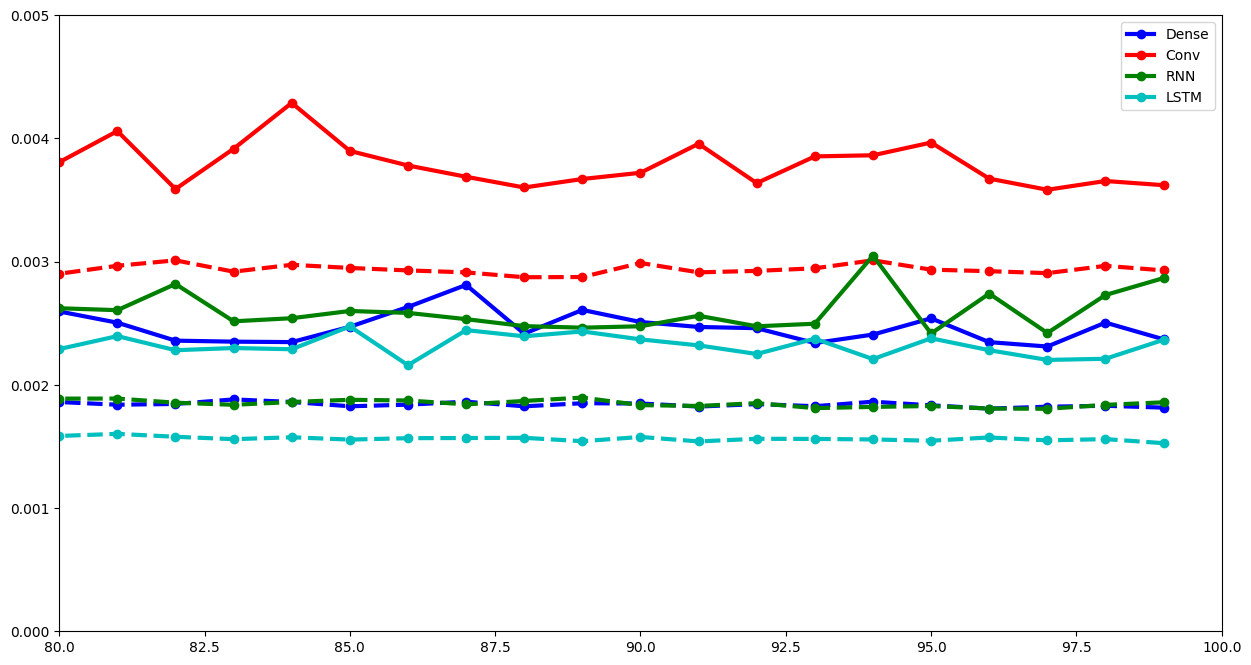

In [12]:
e = range(epochs)

plt.figure(figsize=(15,8))
plt.plot(e,history_dense.history['loss'], 'bo--', linewidth=3)
plt.plot(e,history_dense.history['val_loss'], 'bo-', linewidth=3,label='Dense')
plt.plot(e,history_1Dconv.history['loss'], 'ro--', linewidth=3)
plt.plot(e,history_1Dconv.history['val_loss'], 'ro-', linewidth=3,label='Conv')
plt.plot(e,history_simprnn.history['loss'], 'go--', linewidth=3)
plt.plot(e,history_simprnn.history['val_loss'], 'go-', linewidth=3,label='RNN')
plt.plot(e,history_lstm.history['loss'], 'co--', linewidth=3)
plt.plot(e,history_lstm.history['val_loss'], 'co-', linewidth=3, label='LSTM')
plt.xlim(80,100)
plt.ylim(0,0.005)
plt.legend()